In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('eventlog_large.csv', sep=';')
df.head()

,Case_ID,Activity,User,Timestamp
0,1,a,u2,2016-04-15 08:41:28
1,1,b,u3,2016-04-18 12:55:01
2,2,a,u2,2016-04-18 20:40:14
3,1,d,u5,2016-04-19 07:22:59
4,2,b,u4,2016-04-21 22:42:39


In [3]:
df_sort = df.copy()
df_sort = df_sort.sort_values(by=['Case_ID', 'Timestamp'], ascending=True)
df_sort.head()

,Case_ID,Activity,User,Timestamp
0,1,a,u2,2016-04-15 08:41:28
1,1,b,u3,2016-04-18 12:55:01
3,1,d,u5,2016-04-19 07:22:59
5,1,e,u7,2016-04-23 15:06:58
7,1,f,u7,2016-04-24 19:18:32


In [4]:
df_sort['Count'] = df_sort.groupby('Case_ID').cumcount()+1
df_sort

,Case_ID,Activity,User,Timestamp,Count
0,1,a,u2,2016-04-15 08:41:28,1
1,1,b,u3,2016-04-18 12:55:01,2
3,1,d,u5,2016-04-19 07:22:59,3
5,1,e,u7,2016-04-23 15:06:58,4
7,1,f,u7,2016-04-24 19:18:32,5
...,...,...,...,...,...
45371,7549,d,u5,2120-07-15 03:40:37,3
45373,7549,g,u6,2120-07-19 05:39:32,4
45374,7549,e,u7,2120-07-20 18:29:17,5
45376,7549,f,u7,2120-07-22 03:43:02,6


In [5]:
df_pivot = df_sort.copy()
df_pivot = df_pivot.pivot(index='Case_ID', columns='Count', values='User')
df_pivot

Count,1,2,3,4,5,6,7
Case_ID,,,,,,,
1,u2,u3,u5,u7,u7,u5,u2
2,u2,u4,u6,u5,u7,u7,u1
3,u2,u3,u5,u5,u8,u8,u2
4,u1,u3,u5,u5,u7,u8,u1
5,u1,u3,u2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
7545,u2,u3,u5,u7,u7,u6,u1
7546,u2,u3,u6,u8,u7,u6,u2
7547,u2,u4,u6,u6,u7,u7,u1


In [6]:
df_pivot = df_pivot.fillna('X')
df_pivot = df_pivot.astype('str')
df_pivot['Trace'] = df_pivot.apply(lambda x: ','.join(x), axis=1)
df_pivot['Trace'] = df_pivot['Trace'].apply(lambda x: x.replace(',X',''))

df_pivot

Count,1,2,3,4,5,6,7,Trace
Case_ID,,,,,,,,
1,u2,u3,u5,u7,u7,u5,u2,"u2,u3,u5,u7,u7,u5,u2"
2,u2,u4,u6,u5,u7,u7,u1,"u2,u4,u6,u5,u7,u7,u1"
3,u2,u3,u5,u5,u8,u8,u2,"u2,u3,u5,u5,u8,u8,u2"
4,u1,u3,u5,u5,u7,u8,u1,"u1,u3,u5,u5,u7,u8,u1"
5,u1,u3,u2,X,X,X,X,"u1,u3,u2"
...,...,...,...,...,...,...,...,...
7545,u2,u3,u5,u7,u7,u6,u1,"u2,u3,u5,u7,u7,u6,u1"
7546,u2,u3,u6,u8,u7,u6,u2,"u2,u3,u6,u8,u7,u6,u2"
7547,u2,u4,u6,u6,u7,u7,u1,"u2,u4,u6,u6,u7,u7,u1"


In [7]:
df_pivot_2=df_pivot[['Trace',1]].groupby(['Trace'], as_index=False).count()
df_pivot_2 = df_pivot_2.sort_values(by=1, ascending=False).reset_index()
del df_pivot_2['index']
df_pivot_2 = df_pivot_2.reset_index()
df_pivot_2['index'] = df_pivot_2['index']+1
df_pivot_2 = df_pivot_2.rename(columns={'index':'Variants',1:'Count'})
df_pivot_2

Count,Variants,Trace,Count
0,1,"u2,u3,u2",404
1,2,"u2,u3,u1",377
2,3,"u1,u3,u1",265
3,4,"u1,u3,u2",258
4,5,"u2,u4,u1",179
...,...,...,...
373,374,"u1,u4,u6,u7,u6,u7,u1",1
374,375,"u1,u4,u5,u7,u5,u7,u2",1
375,376,"u2,u4,u6,u7,u5,u8,u2",1
376,377,"u1,u4,u6,u8,u6,u7,u2",1


In [8]:
df_pivot_2.to_csv('Case_Count_2.csv', index=False)

In [9]:
#DF CASE
df_case = df_sort.copy()
df_case

,Case_ID,Activity,User,Timestamp,Count
0,1,a,u2,2016-04-15 08:41:28,1
1,1,b,u3,2016-04-18 12:55:01,2
3,1,d,u5,2016-04-19 07:22:59,3
5,1,e,u7,2016-04-23 15:06:58,4
7,1,f,u7,2016-04-24 19:18:32,5
...,...,...,...,...,...
45371,7549,d,u5,2120-07-15 03:40:37,3
45373,7549,g,u6,2120-07-19 05:39:32,4
45374,7549,e,u7,2120-07-20 18:29:17,5
45376,7549,f,u7,2120-07-22 03:43:02,6


In [10]:
df_case['Timestamp'] = pd.to_datetime(df['Timestamp'])
df_case = df_case.pivot(index='Case_ID',columns='Count', values='Timestamp')
df_case['Max'] = df_case.apply(max, axis=1)
df_case['Case Duration'] = df_case['Max'] - df_case[1]

df_case

Count,1,2,3,4,5,6,7,Max,Case Duration
Case_ID,,,,,,,,,
1,2016-04-15 08:41:28,2016-04-18 12:55:01,2016-04-19 07:22:59,2016-04-23 15:06:58,2016-04-24 19:18:32,2016-04-25 14:56:42,2016-04-26 10:00:36,2016-04-26 10:00:36,11 days 01:19:08
2,2016-04-18 20:40:14,2016-04-21 22:42:39,2016-04-24 01:29:27,2016-04-25 22:36:27,2016-04-27 16:12:28,2016-04-28 15:00:35,2016-05-01 18:32:18,2016-05-01 18:32:18,12 days 21:52:04
3,2016-04-27 01:45:07,2016-04-27 21:50:32,2016-04-29 00:12:15,2016-04-29 16:24:46,2016-04-30 22:57:03,2016-05-02 01:33:30,2016-05-02 11:06:53,2016-05-02 11:06:53,5 days 09:21:46
4,2016-05-02 08:38:34,2016-05-06 00:50:31,2016-05-06 17:56:11,2016-05-13 10:34:23,2016-05-13 13:56:10,2016-05-14 23:42:03,2016-05-17 14:02:28,2016-05-17 14:02:28,15 days 05:23:54
5,2016-05-09 07:17:12,2016-05-10 06:29:42,2016-05-11 05:04:34,NaT,NaT,NaT,NaT,2016-05-11 05:04:34,1 days 21:47:22
...,...,...,...,...,...,...,...,...,...
7545,2120-06-24 17:36:03,2120-06-25 11:13:57,2120-06-26 00:22:29,2120-06-28 04:06:45,2120-06-28 22:15:25,2120-06-28 22:55:12,2120-07-02 01:29:52,2120-07-02 01:29:52,7 days 07:53:49
7546,2120-07-01 11:45:11,2120-07-02 00:35:36,2120-07-03 22:47:22,2120-07-04 21:58:41,2120-07-05 03:37:20,2120-07-09 10:36:39,2120-07-11 13:00:03,2120-07-11 13:00:03,10 days 01:14:52
7547,2120-07-04 17:07:06,2120-07-06 16:22:39,2120-07-10 04:24:14,2120-07-13 20:46:17,2120-07-16 06:18:37,2120-07-21 23:42:12,2120-07-22 22:17:09,2120-07-22 22:17:09,18 days 05:10:03


In [11]:
max_length = df_sort['Count'].max()

In [12]:
df_case['Case Length'] = max_length-df_case.isnull().sum(axis=1)

In [13]:
df_case

Count,1,2,3,4,5,6,7,Max,Case Duration,Case Length
Case_ID,,,,,,,,,,
1,2016-04-15 08:41:28,2016-04-18 12:55:01,2016-04-19 07:22:59,2016-04-23 15:06:58,2016-04-24 19:18:32,2016-04-25 14:56:42,2016-04-26 10:00:36,2016-04-26 10:00:36,11 days 01:19:08,7
2,2016-04-18 20:40:14,2016-04-21 22:42:39,2016-04-24 01:29:27,2016-04-25 22:36:27,2016-04-27 16:12:28,2016-04-28 15:00:35,2016-05-01 18:32:18,2016-05-01 18:32:18,12 days 21:52:04,7
3,2016-04-27 01:45:07,2016-04-27 21:50:32,2016-04-29 00:12:15,2016-04-29 16:24:46,2016-04-30 22:57:03,2016-05-02 01:33:30,2016-05-02 11:06:53,2016-05-02 11:06:53,5 days 09:21:46,7
4,2016-05-02 08:38:34,2016-05-06 00:50:31,2016-05-06 17:56:11,2016-05-13 10:34:23,2016-05-13 13:56:10,2016-05-14 23:42:03,2016-05-17 14:02:28,2016-05-17 14:02:28,15 days 05:23:54,7
5,2016-05-09 07:17:12,2016-05-10 06:29:42,2016-05-11 05:04:34,NaT,NaT,NaT,NaT,2016-05-11 05:04:34,1 days 21:47:22,3
...,...,...,...,...,...,...,...,...,...,...
7545,2120-06-24 17:36:03,2120-06-25 11:13:57,2120-06-26 00:22:29,2120-06-28 04:06:45,2120-06-28 22:15:25,2120-06-28 22:55:12,2120-07-02 01:29:52,2120-07-02 01:29:52,7 days 07:53:49,7
7546,2120-07-01 11:45:11,2120-07-02 00:35:36,2120-07-03 22:47:22,2120-07-04 21:58:41,2120-07-05 03:37:20,2120-07-09 10:36:39,2120-07-11 13:00:03,2120-07-11 13:00:03,10 days 01:14:52,7
7547,2120-07-04 17:07:06,2120-07-06 16:22:39,2120-07-10 04:24:14,2120-07-13 20:46:17,2120-07-16 06:18:37,2120-07-21 23:42:12,2120-07-22 22:17:09,2120-07-22 22:17:09,18 days 05:10:03,7


In [14]:
df_columns = df_sort['Count'].unique()
df_columns

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [15]:
df_case = df_case.drop(df_columns, axis=1)
df_case

Count,Max,Case Duration,Case Length
Case_ID,,,
1,2016-04-26 10:00:36,11 days 01:19:08,7
2,2016-05-01 18:32:18,12 days 21:52:04,7
3,2016-05-02 11:06:53,5 days 09:21:46,7
4,2016-05-17 14:02:28,15 days 05:23:54,7
5,2016-05-11 05:04:34,1 days 21:47:22,3
...,...,...,...
7545,2120-07-02 01:29:52,7 days 07:53:49,7
7546,2120-07-11 13:00:03,10 days 01:14:52,7
7547,2120-07-22 22:17:09,18 days 05:10:03,7


In [16]:
df_pivot_3 = df_sort.copy()
df_pivot_3 = df_pivot_3.pivot(index='Case_ID', columns='Count', values='User')
df_pivot_3

Count,1,2,3,4,5,6,7
Case_ID,,,,,,,
1,u2,u3,u5,u7,u7,u5,u2
2,u2,u4,u6,u5,u7,u7,u1
3,u2,u3,u5,u5,u8,u8,u2
4,u1,u3,u5,u5,u7,u8,u1
5,u1,u3,u2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
7545,u2,u3,u5,u7,u7,u6,u1
7546,u2,u3,u6,u8,u7,u6,u2
7547,u2,u4,u6,u6,u7,u7,u1


In [17]:
def last_activity(a):
    if a.last_valid_index() is None:
        return np.nan
    else:
        return a[a.last_valid_index()]

In [18]:
df_pivot_3['Last User'] = df_pivot_3.apply(last_activity, axis=1)
df_pivot_3['First User'] = df_pivot_3[1]
df_pivot_3 = df_pivot_3.drop(df_columns,axis=1)
df_pivot_3

Count,Last User,First User
Case_ID,,
1,u2,u2
2,u1,u2
3,u2,u2
4,u1,u1
5,u2,u1
...,...,...
7545,u1,u2
7546,u2,u2
7547,u1,u2


In [19]:
df_case = df_case.drop(['Max'],axis=1)

In [20]:
df_pivot_4 = df_pivot.copy()
df_pivot_4 = df_pivot_4.reset_index()
df_pivot_4 = df_pivot_4[['Case_ID','Trace']]
df_pivot_4

Count,Case_ID,Trace
0,1,"u2,u3,u5,u7,u7,u5,u2"
1,2,"u2,u4,u6,u5,u7,u7,u1"
2,3,"u2,u3,u5,u5,u8,u8,u2"
3,4,"u1,u3,u5,u5,u7,u8,u1"
4,5,"u1,u3,u2"
...,...,...
7544,7545,"u2,u3,u5,u7,u7,u6,u1"
7545,7546,"u2,u3,u6,u8,u7,u6,u2"
7546,7547,"u2,u4,u6,u6,u7,u7,u1"
7547,7548,"u1,u3,u2"


In [21]:
df_pivot_5 = df_pivot_3.merge(df_pivot_4, left_on='Case_ID', right_on='Case_ID', how='inner')

In [22]:
df_case_2 = df_pivot_5.merge(df_case, left_on='Case_ID', right_on='Case_ID', how='inner')
df_case_2.head()

Count,Case_ID,Last User,First User,Trace,Case Duration,Case Length
0,1,u2,u2,"u2,u3,u5,u7,u7,u5,u2",11 days 01:19:08,7
1,2,u1,u2,"u2,u4,u6,u5,u7,u7,u1",12 days 21:52:04,7
2,3,u2,u2,"u2,u3,u5,u5,u8,u8,u2",5 days 09:21:46,7
3,4,u1,u1,"u1,u3,u5,u5,u7,u8,u1",15 days 05:23:54,7
4,5,u2,u1,"u1,u3,u2",1 days 21:47:22,3


In [23]:
df_case_3 = df_case_2.merge(df_pivot_2, left_on='Trace', right_on='Trace', how='outer').sort_values(by='Case_ID')
df_case_3 = df_case_3[['Case_ID','Case Duration','Case Length','Variants','First User','Last User']]
df_case_3['Case Duration'] = df_case_3['Case Duration'].apply(lambda x: round(x.total_seconds(),0))
df_case_3.head()

Count,Case_ID,Case Duration,Case Length,Variants,First User,Last User
0,1,955148.0,7,83,u2,u2
24,2,1115524.0,7,304,u2,u1
27,3,465706.0,7,66,u2,u2
56,4,1315434.0,7,48,u1,u1
90,5,164842.0,3,4,u1,u2


In [24]:
df_case_3.to_csv('Case_2.csv', index=False)

In [25]:
#DF NODE
df_node = df.copy()
df_node = df_node[['Case_ID','Activity','Timestamp','User']]
df_node = df_node.sort_values(by=['Case_ID','Timestamp','Activity'],ascending=True).reset_index(drop=True)

df_node

,Case_ID,Activity,Timestamp,User
0,1,a,2016-04-15 08:41:28,u2
1,1,b,2016-04-18 12:55:01,u3
2,1,d,2016-04-19 07:22:59,u5
3,1,e,2016-04-23 15:06:58,u7
4,1,f,2016-04-24 19:18:32,u7
...,...,...,...,...
45374,7549,d,2120-07-15 03:40:37,u5
45375,7549,g,2120-07-19 05:39:32,u6
45376,7549,e,2120-07-20 18:29:17,u7
45377,7549,f,2120-07-22 03:43:02,u7


In [26]:
sort1 = df_node.iloc[:-1,:]
sort2 = df_node.iloc[1:,:].reset_index(drop=True)
sort = pd.concat([sort1,sort2],axis=1)
sort.columns = ['Case_ID','Activity1','Timestamp1','Source','Case_ID2','Activity2','Timestamp2','Target']
sort['Comparison'] = sort.apply(lambda x: True if x['Case_ID'] == x['Case_ID2'] else False,axis=1)
sort = sort[sort['Comparison'] == True]
sort['Count'] = sort.groupby('Case_ID').cumcount() + 1
sort = sort.sort_values(by=['Case_ID','Count'], ascending=[True,False])
sort.reset_index(drop=True)
sort['Count_Reverse'] = sort.groupby('Case_ID').cumcount()+1
sort = sort.sort_values(by=['Case_ID', 'Count'], ascending=[True,False]).reset_index(drop=True)
sort['Start_Connect'] = sort['Count'].apply(lambda x: 'Start' if x==1 else '')
sort['End_Connect'] = sort['Count_Reverse'].apply(lambda x: 'End' if x==1 else '')

sort['Timestamp1'] = pd.to_datetime(sort['Timestamp1'])
sort['Timestamp2'] = pd.to_datetime(sort['Timestamp2'])
sort['Duration'] = sort['Timestamp1'] - sort['Timestamp2']
sort['Duration'] = sort['Duration'].apply(lambda x: round(x.total_seconds(),0))

sort

,Case_ID,Activity1,Timestamp1,Source,Case_ID2,Activity2,Timestamp2,Target,Comparison,Count,Count_Reverse,Start_Connect,End_Connect,Duration
0,1,g,2016-04-25 14:56:42,u5,1,h,2016-04-26 10:00:36,u2,True,6,1,,End,-68634.0
1,1,f,2016-04-24 19:18:32,u7,1,g,2016-04-25 14:56:42,u5,True,5,2,,,-70690.0
2,1,e,2016-04-23 15:06:58,u7,1,f,2016-04-24 19:18:32,u7,True,4,3,,,-101494.0
3,1,d,2016-04-19 07:22:59,u5,1,e,2016-04-23 15:06:58,u7,True,3,4,,,-373439.0
4,1,b,2016-04-18 12:55:01,u3,1,d,2016-04-19 07:22:59,u5,True,2,5,,,-66478.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37825,7549,e,2120-07-20 18:29:17,u7,7549,f,2120-07-22 03:43:02,u7,True,5,2,,,-119625.0
37826,7549,g,2120-07-19 05:39:32,u6,7549,e,2120-07-20 18:29:17,u7,True,4,3,,,-132585.0
37827,7549,d,2120-07-15 03:40:37,u5,7549,g,2120-07-19 05:39:32,u6,True,3,4,,,-352735.0
37828,7549,b,2120-07-14 22:42:16,u3,7549,d,2120-07-15 03:40:37,u5,True,2,5,,,-17901.0


In [27]:
sort.to_csv('Node_2.csv', index=False)

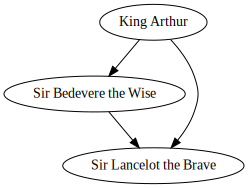

In [28]:
import graphviz
# dot = graphviz.Digraph(comment='The Round Table')

# dot.node('A', 'King Arthur')
# dot.node('B', 'Sir Bedevere the Wise')
# dot.node('C', 'Sir Lancelot the Brave')

# dot.edges(['AB','AC'])
# dot.edge('B', 'C', constraint='true')

# dot

In [29]:
# data = {'src':['a','c','b','d','d','a','b'],'dst':['b','d','a','c','a','a','b'],'weight':[2,7,5,1,3,4,1]}
# df = pd.DataFrame(data)
# df

In [30]:
# G = graphviz.Digraph(format='jpeg')

# G.attr(rankdir='LR')
# G.attr('node', shape='circle')

# nodelist = []
# for idx, row in df.iterrows():
#     node1, node2, weight = [str(i) for i in row]
    
#     if node1 not in nodelist:
#         G.node(node1)
#         nodelist.append(node2)
#     if node2 not in nodelist:
#         G.node(node2)
#         nodelist.append(node2)
        
#     G.edge(node1, node2, label = weight)
    
# G

In [31]:
sortnew1 = df_node.iloc[:-1,:]
sortnew2 = df_node.iloc[1:,:].reset_index(drop=True)
sortnew = pd.concat([sortnew1,sortnew2],axis=1)
sortnew.columns = ['Case_ID','Activity1','Timestamp1','Source','Case_ID2','Activity2','Timestamp2','Target']
sortnew['Comparison'] = sortnew.apply(lambda x: True if x['Case_ID'] == x['Case_ID2'] else False,axis=1)
sortnew = sortnew[sortnew['Comparison'] == True]
sortnew

,Case_ID,Activity1,Timestamp1,Source,Case_ID2,Activity2,Timestamp2,Target,Comparison
0,1,a,2016-04-15 08:41:28,u2,1,b,2016-04-18 12:55:01,u3,True
1,1,b,2016-04-18 12:55:01,u3,1,d,2016-04-19 07:22:59,u5,True
2,1,d,2016-04-19 07:22:59,u5,1,e,2016-04-23 15:06:58,u7,True
3,1,e,2016-04-23 15:06:58,u7,1,f,2016-04-24 19:18:32,u7,True
4,1,f,2016-04-24 19:18:32,u7,1,g,2016-04-25 14:56:42,u5,True
...,...,...,...,...,...,...,...,...,...
45373,7549,b,2120-07-14 22:42:16,u3,7549,d,2120-07-15 03:40:37,u5,True
45374,7549,d,2120-07-15 03:40:37,u5,7549,g,2120-07-19 05:39:32,u6,True
45375,7549,g,2120-07-19 05:39:32,u6,7549,e,2120-07-20 18:29:17,u7,True
45376,7549,e,2120-07-20 18:29:17,u7,7549,f,2120-07-22 03:43:02,u7,True


In [32]:
sortnew1 = sortnew[['Case_ID', 'Source','Target']]
countsort = sortnew1.groupby(['Source','Target']).size()
newcountsort = countsort.to_frame(name='weight').reset_index()
newcountsort

,Source,Target,weight
0,u1,u3,2113
1,u1,u4,890
2,u2,u3,3168
3,u2,u4,1378
4,u3,u1,642
5,u3,u2,662
6,u3,u5,3155
7,u3,u6,822
8,u4,u1,285
9,u4,u2,277


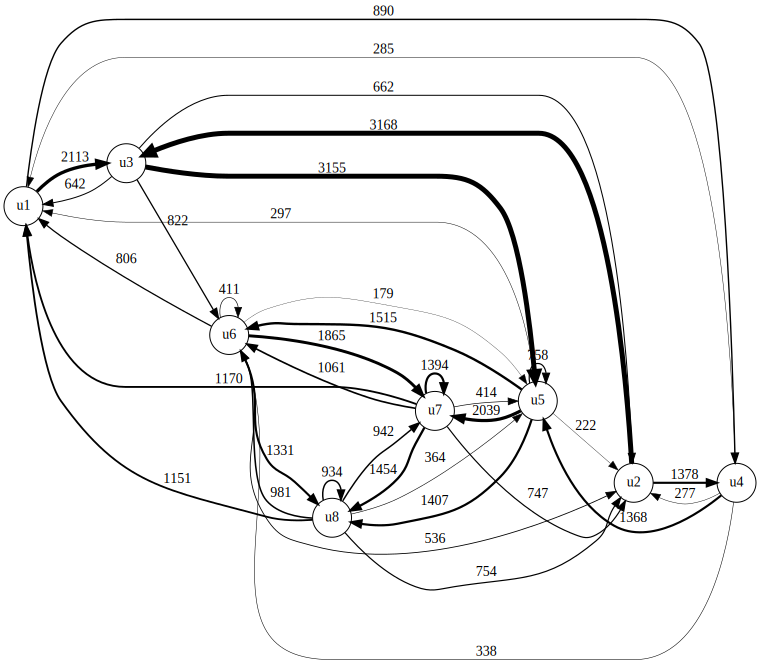

In [73]:
# Activity flow towards the users
G = graphviz.Digraph(format='jpeg')

G.attr(rankdir='LR')
G.attr('node', shape='circle')

max_node = 5
max_case_id = newcountsort['weight'].max()

nodelist = []
for idx, row in newcountsort.iterrows():
    node1, node2, weight = [str(i) for i in row]
    
    if node1 not in nodelist:
        G.node(node1)
        nodelist.append(node2)
    if node2 not in nodelist:
        G.node(node2)
        nodelist.append(node2)
        
    G.edge(node1, node2, label = weight, penwidth=str(int(weight)/max_case_id*max_node))
    
G

In [34]:
# Activity flow per activity
sortnew2 = sortnew[['Case_ID', 'Activity1','Activity2']]
countsort2 = sortnew2.groupby(['Activity1','Activity2']).size()
newcountsort1 = countsort2.to_frame(name='weight').reset_index()
newcountsort1

,Activity1,Activity2,weight
0,a,b,7549
1,b,c,1866
2,b,d,5683
3,d,e,2820
4,d,g,2863
5,e,f,4724
6,e,g,959
7,f,g,1861
8,f,h,3822
9,g,e,2863


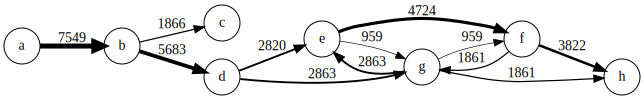

In [72]:
H = graphviz.Digraph(format='jpeg')

H.attr(rankdir='LR')
H.attr('node', shape='circle')

max_node = 5
max_case_id = newcountsort1['weight'].max()

nodelist2 = []
for idx, row in newcountsort1.iterrows():
    node11, node22, weight2 = [str(i) for i in row]
    
    if node11 not in nodelist2:
        H.node(node11)
        nodelist2.append(node22)
    if node22 not in nodelist2:
        H.node(node22)
        nodelist2.append(node22)
        
    H.edge(node11, node22, label = weight2, penwidth=str(int(weight2)/max_case_id*max_node))
    
H

In [36]:
#Average Time per activity
sortnewtime = sortnew.copy()
sortnewtime['Timestamp1'] = pd.to_datetime(sortnewtime['Timestamp1'])
sortnewtime['Timestamp2'] = pd.to_datetime(sortnewtime['Timestamp2'])
sortnewtime['Duration'] = sortnewtime['Timestamp2'] - sortnewtime['Timestamp1']
sortnewtime
# sort['Duration'] = sort['Duration'].apply(lambda x: round(x.total_seconds(),0))

,Case_ID,Activity1,Timestamp1,Source,Case_ID2,Activity2,Timestamp2,Target,Comparison,Duration
0,1,a,2016-04-15 08:41:28,u2,1,b,2016-04-18 12:55:01,u3,True,3 days 04:13:33
1,1,b,2016-04-18 12:55:01,u3,1,d,2016-04-19 07:22:59,u5,True,0 days 18:27:58
2,1,d,2016-04-19 07:22:59,u5,1,e,2016-04-23 15:06:58,u7,True,4 days 07:43:59
3,1,e,2016-04-23 15:06:58,u7,1,f,2016-04-24 19:18:32,u7,True,1 days 04:11:34
4,1,f,2016-04-24 19:18:32,u7,1,g,2016-04-25 14:56:42,u5,True,0 days 19:38:10
...,...,...,...,...,...,...,...,...,...,...
45373,7549,b,2120-07-14 22:42:16,u3,7549,d,2120-07-15 03:40:37,u5,True,0 days 04:58:21
45374,7549,d,2120-07-15 03:40:37,u5,7549,g,2120-07-19 05:39:32,u6,True,4 days 01:58:55
45375,7549,g,2120-07-19 05:39:32,u6,7549,e,2120-07-20 18:29:17,u7,True,1 days 12:49:45
45376,7549,e,2120-07-20 18:29:17,u7,7549,f,2120-07-22 03:43:02,u7,True,1 days 09:13:45


In [37]:
sortnewtime2 = sortnewtime.copy()
sortnewtime2 = sortnewtime2[['Activity1','Activity2','Duration']]
sortnewtime2['Duration'] = sortnewtime2['Duration'].apply(lambda x: round(x.total_seconds(),0))

sortnewtime2 = sortnewtime2.groupby(['Activity1','Activity2']).mean().reset_index()
sortnewtime2['Duration'] = round(sortnewtime2['Duration']/86400,2)
# sortnewtime2 = sortnewtime2.to_frame()
sortnewtime2

,Activity1,Activity2,Duration
0,a,b,2.13
1,b,c,1.29
2,b,d,1.54
3,d,e,3.39
4,d,g,3.42
5,e,f,1.75
6,e,g,1.11
7,f,g,2.25
8,f,h,2.29
9,g,e,2.59


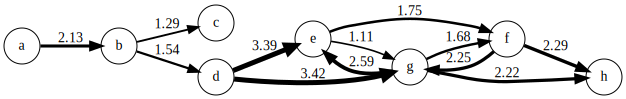

In [69]:
Z = graphviz.Digraph(format='jpeg')

Z.attr(rankdir='LR')
Z.attr('node', shape='circle')

max_node = 5
max_case_id = sortnewtime2['Duration'].max()

nodelist2 = []
for idx, row in sortnewtime2.iterrows():
    node11, node22, weight2 = [str(i) for i in row]
    
    if node11 not in nodelist2:
        Z.node(node11)
        nodelist2.append(node22)
    if node22 not in nodelist2:
        Z.node(node22)
        nodelist2.append(node22)
        
    Z.edge(node11, node22, label = weight2, penwidth=str(float(weight2)/max_case_id*max_node)) 
Z

In [66]:
sortnewtime2['Duration'].max()

3.42

In [39]:
# Individual activities per user
iapu = df.copy()
iapu = iapu[['Activity','User']]
iapu = iapu.groupby(['Activity','User']).size()
iapu = iapu.to_frame(name='Weight').reset_index()
iapu

,Activity,User,Weight
0,a,u1,3003
1,a,u2,4546
2,b,u3,5281
3,b,u4,2268
4,c,u1,927
5,c,u2,939
6,d,u5,4523
7,d,u6,1160
8,e,u7,3412
9,e,u8,2271


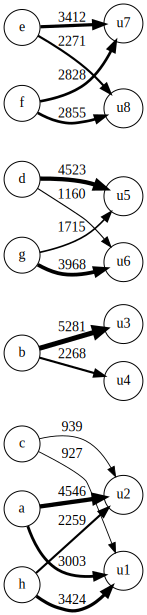

In [71]:
ZA = graphviz.Digraph(format='jpeg')

ZA.attr(rankdir='LR')
ZA.attr('node', shape='circle')

max_node = 5
max_case_id = iapu['Weight'].max()
nodelist2 = []
for idx, row in iapu.iterrows():
    node11, node22, weight2 = [str(i) for i in row]
    
    if node11 not in nodelist2:
        ZA.node(node11)
        nodelist2.append(node22)
    if node22 not in nodelist2:
        ZA.node(node22)
        nodelist2.append(node22)
        
    ZA.edge(node11, node22, label = weight2, penwidth=str(int(weight2)/max_case_id*max_node))
ZA

In [82]:
# Average time a user spends on each activity
sortnewtime4 = sortnewtime.copy()
sortnewtime4 = sortnewtime4[['Source','Activity1','Activity2','Duration']]
sortnewtime4['Duration'] = sortnewtime4['Duration'].apply(lambda x: round(x.total_seconds(),0))

sortnewtime4 = sortnewtime4.groupby(['Source','Activity1','Activity2']).mean().reset_index()
sortnewtime4['Duration'] = round(sortnewtime4['Duration']/86400,2)
sortnewtime4

,Source,Activity1,Activity2,Duration
0,u1,a,b,2.13
1,u2,a,b,2.13
2,u3,b,c,1.29
3,u3,b,d,1.56
4,u4,b,c,1.27
5,u4,b,d,1.47
6,u5,d,e,3.42
7,u5,d,g,3.46
8,u5,g,e,2.68
9,u5,g,f,1.25


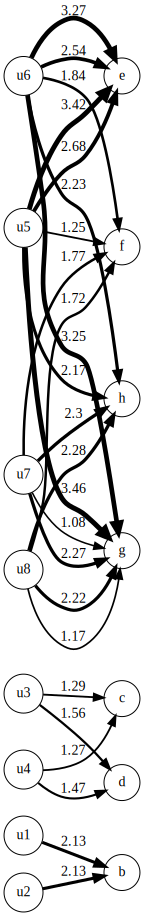

In [92]:
ZB = graphviz.Digraph(format='jpeg')

ZB.attr(rankdir='LR')
ZB.attr('node', shape='circle')

max_node = 5
max_case_id = sortnewtime4['Duration'].max()
nodelist2 = []

for idx, row in sortnewtime4.iterrows():
    node11, node22, node33, weight2 = [str(i) for i in row]
    
    if node11 not in nodelist2:
        ZB.node(node11)
        nodelist2.append(node22)
    if node22 not in nodelist2:
        ZB.node(node22)
        nodelist2.append(node22)
    if node33 not in nodelist2:
        ZB.node(node33)
        nodelist2.append(node33)
        
    ZB.edge(node11, node33, label = weight2, penwidth=str(float(weight2)/max_case_id*max_node))
ZB